In [140]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

import seaborn as sns 
import yfinance as yf
from datetime import date


In [62]:
# colecting data of MGLU3, Ibovespa and BOVA11
MG=yf.download("MGLU3.SA", start='2019-01-01')
ibov= yf.download('^BVSP', start='2024-01-01')
bova=yf.download('BOVA11.SA', start='2019-01-01')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


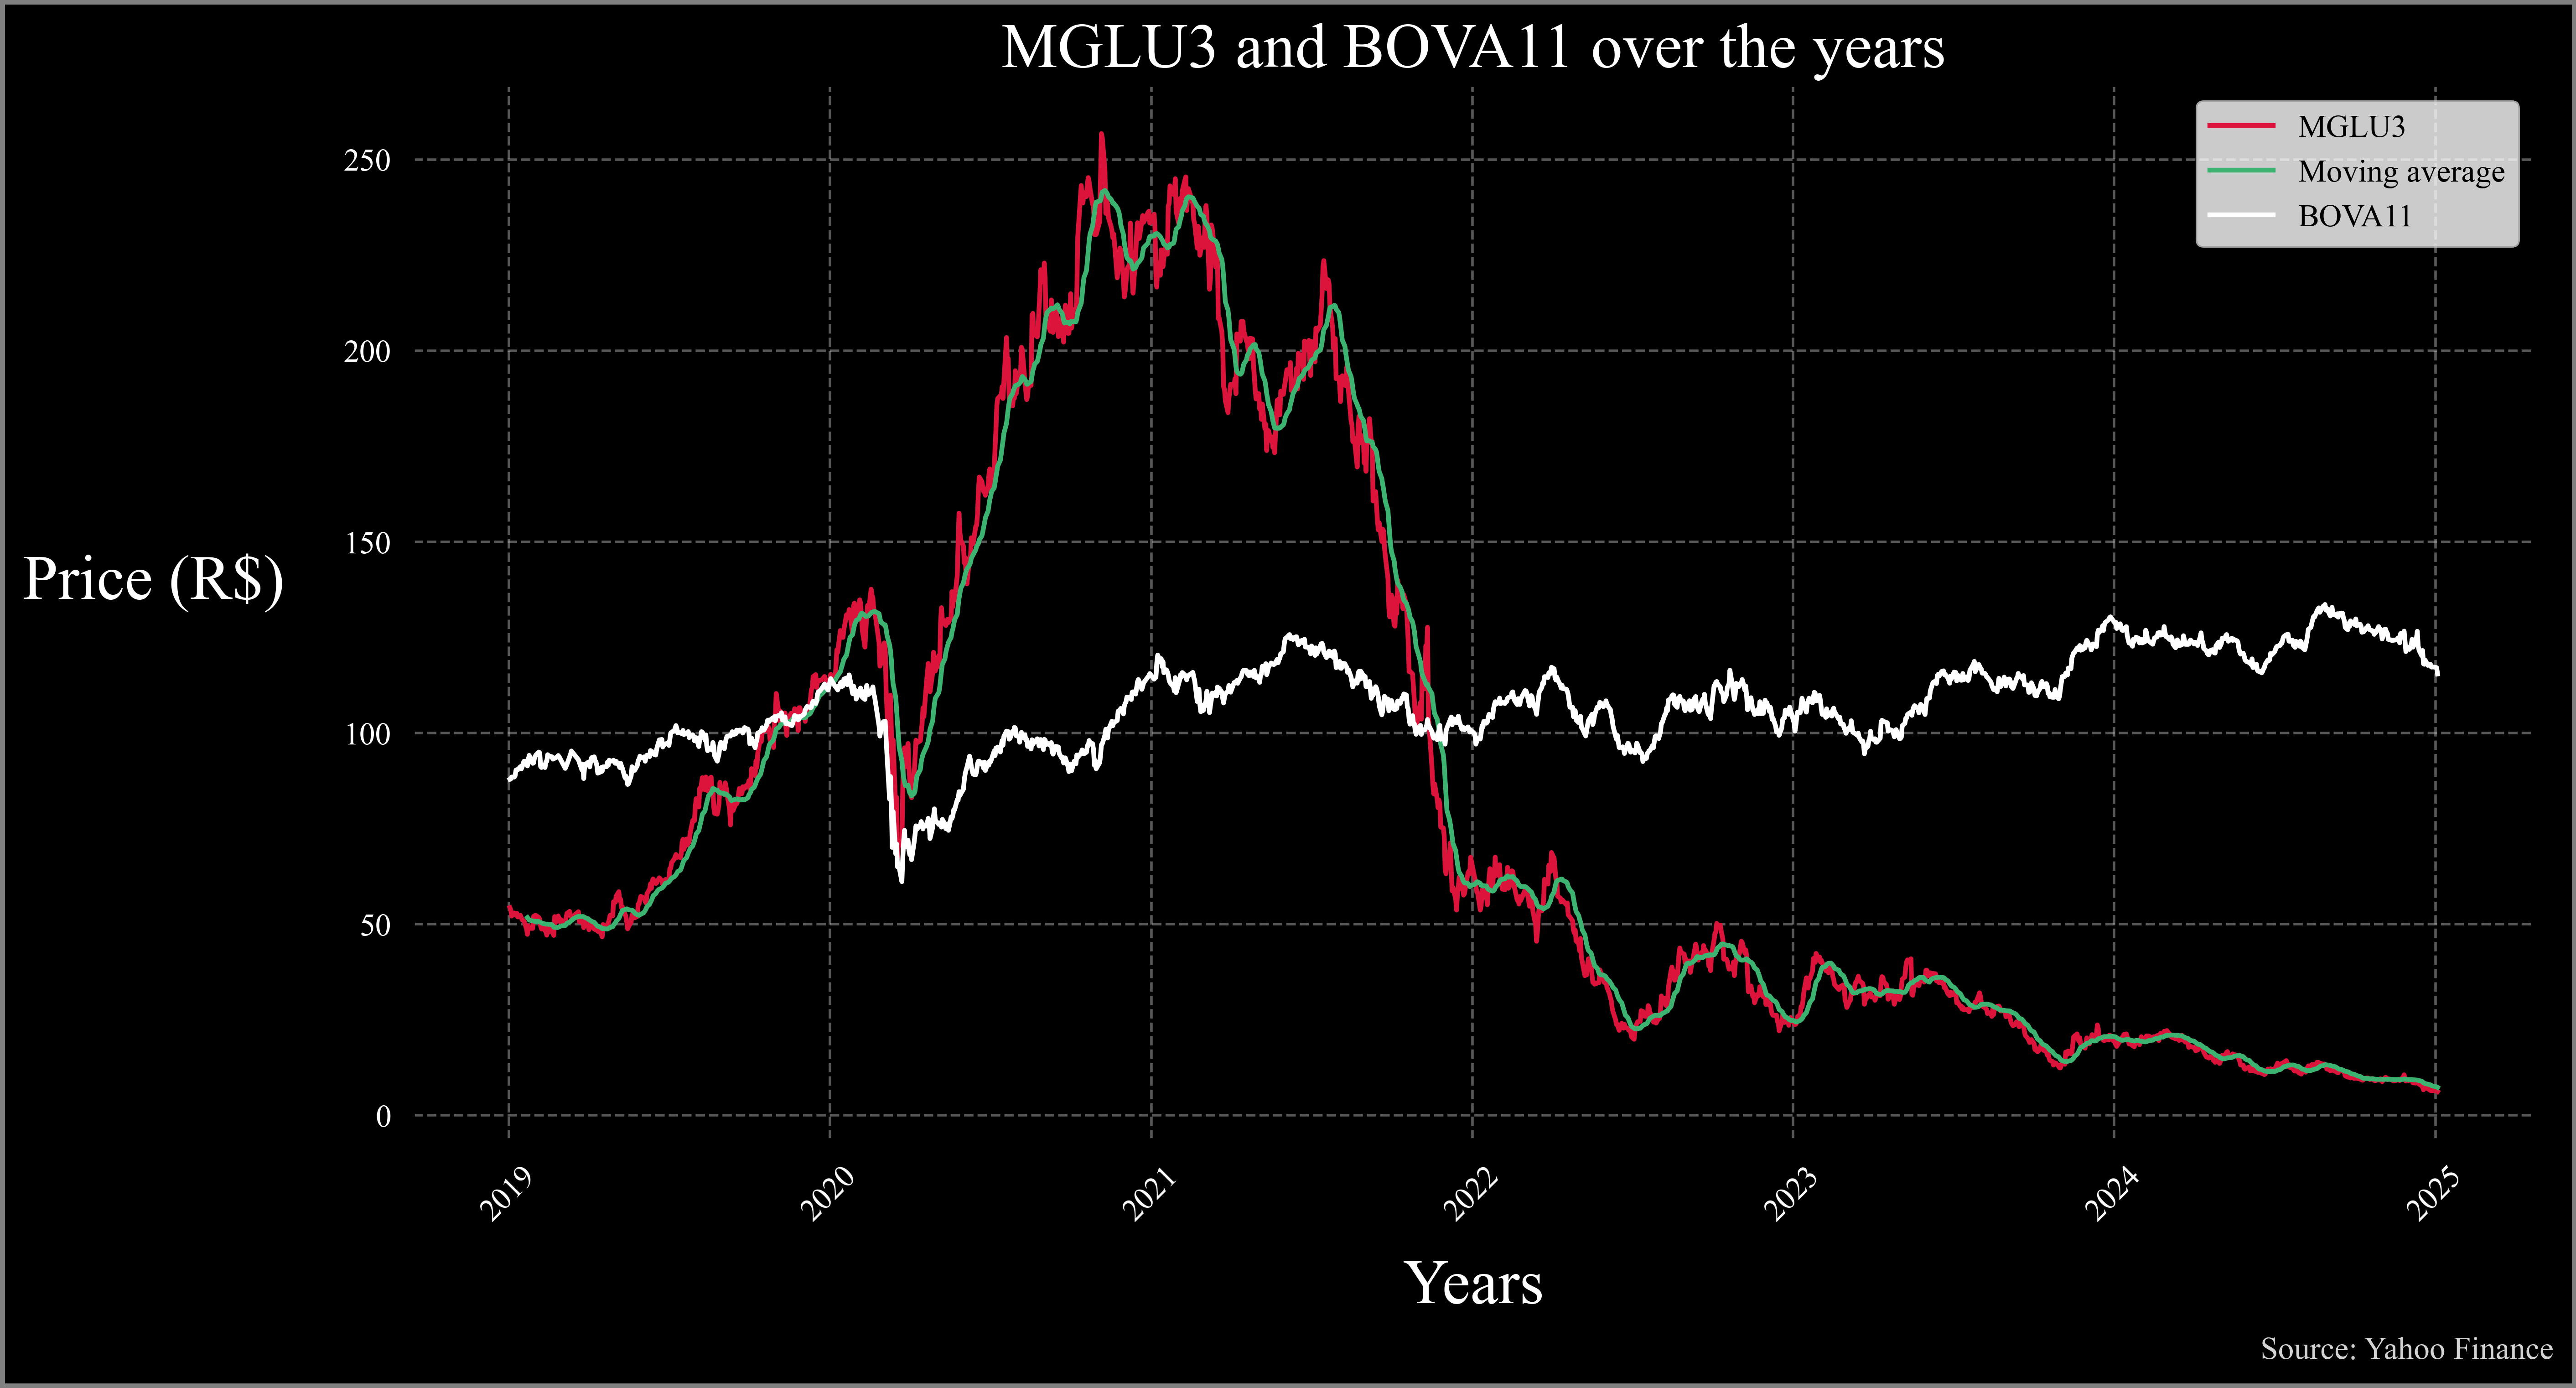

In [218]:
plt.rcParams['font.family'] = 'Times New Roman' #defining the fonto for the entire plot


plt.figure(figsize=(12,6), facecolor='black', edgecolor='gray', linewidth=3, dpi=500)

#plotting the data that I colected
plt.plot(MG['Close'], label='MGLU3', color='crimson', alpha= 1)
plt.plot(MG['Close'].rolling(15).mean(), label='Moving average', color='mediumseagreen')
plt.plot(bova['Close'],label='BOVA11', color= 'White' )

#Aesthetics
plt.gca().set_facecolor('black') 
plt.title('MGLU3 and BOVA11 over the years', fontsize='20', color='white')
plt.xlabel('Years', fontsize=20, labelpad= 10, color='white')
plt.ylabel('Price (R$)', fontsize=20, rotation=0, labelpad=60, color='white')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.figtext(0.8, -0.05, "Source: Yahoo Finance", fontsize=10, color='lightgray')

plt.xticks(rotation=45, color='white')  # Rotate x-axis labels for better readability
plt.yticks(color='white')

plt.show()

In [8]:
tickers=['^BVSP', 'USDBRL=X']
comp = yf.download(tickers, start='2019-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:

plt.rcParams['font.family'] = 'Times New Roman'
comp.head()
comp=comp.dropna()
comp.columns = ["Dollar", "Ibovespa"]

# Max value for dollar
max_dol=comp['Dollar'].max()
# the date of the maximum value for dollar
date_max_dol=comp['Dollar'].idxmax()

max_ibov=comp['Ibovespa'].max()
date_max_ibov=comp['Ibovespa'].idxmax()

fig, axes= plt.subplots(nrows=2, ncols=1, figsize=(26,10), facecolor='black', sharex=True,edgecolor='gray', linewidth=4)

dol=axes[0]
#Plotting dollar
comp['Dollar'].plot(ax=dol, color='darkseagreen')
dol.tick_params(axis='y', colors='white')
dol.legend(loc='upper left', fontsize=15, facecolor='white', edgecolor='darkseagreen', framealpha=1)
dol.set_ylabel('Price (R$)', color='white', fontsize=25, labelpad=70, rotation=0)
dol.grid(True, linestyle='--', color='gray', alpha=0.5)
dol.scatter(date_max_dol,max_dol, color='red', label= 'Dollar highest price', s=15, zorder=5)
dol.text(pd.to_datetime('2024-06-01'), 6.25, 'SELIC rises to 11,25%', color='goldenrod', fontsize=20, ha='center', va='bottom')




ibv=axes[1]
#plotting Ibovespa
comp['Ibovespa'].plot(ax=axes[1], color='royalblue')
ibv.set_ylabel('Points', color='white', fontsize=25, rotation=0, labelpad=40)
ibv.tick_params(axis='x', colors='white')
ibv.tick_params(axis='y', colors='white')
ibv.legend(loc='upper left', fontsize=15, facecolor='white', edgecolor='white', framealpha=1)
ibv.grid(True, color='gray', linestyle='--', alpha=0.5)
ibv.scatter(date_max_ibov, max_ibov, color='red', label='Ibovespa highest score', s=15,zorder=5)


#apllying general definitions for both plots
for ax in axes:
    ax.set_facecolor('black') #background color
    #vertical line
    ax.axvline(pd.to_datetime('2024-11-06'), color='goldenrod', linestyle='--')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(fontsize=17)  #Adding legends to the plots 
plt.figtext(0.98, 0.01, 'Source: Yahoo finance', ha="center", va="center", fontsize=20, color="white")#caption




# Showing the plot
fig.set_dpi(600)
plt.tight_layout()
plt.show()